<div class="green">
    
# <span style="color:green">Consumer Complaint Response</span>
    
#### <span style="color:lightgreen">GitHubs: [Tyler Kephart](https://github.com/tkephart96) | [Chellyan Moreno](https://github.com/chellyan-moreno) | [Rosendo Lugo](https://github.com/rosendo-lugo) | [Alexia Lewis](https://github.com/lewisalexia)</span>
   
</div>

<div class="alert alert-success">    
    
## Goal: 
This classification NLP project aims to provide an accurate prediction of company response based on the language of a consumer's complaint.

## Description:

Our project involves analyzing 3.5 million consumer complaints to the Consumer Financial Protection Bureau (CFPB) from 2011 to 2023. We'll use Natural language Processing to analyze how the wording of complaints affects a company's response. Our goal is to provide insights on complaint language and its impact, helping companies improve their responses and enhancing the outcomes for consumers and businesses.
  
</div>

# <span style="color:green">Imports</span>
    

In [1]:
#local modules
import wrangle as wr
import explore as ex
import model as mo

#standard
import pandas as pd

#set random state
random_state=123

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_colwidth", 250)

imports loaded successfully, awaiting commands...


# <span style="color:green">Wrangle</span>

---

* <span style="color:green">Data acquired from [Google BigQuery](https://console.cloud.google.com/marketplace/product/cfpb/complaint-database)
* <span style="color:green">3,458,906 rows × 18 columns *before* cleaning
* <span style="color:green">1,238,536 rows x 7 columns *after* cleaning</span>


### <span style="color:lightgreen">Data Dictionary</span>

<details>
  <summary>Show Data Dictionary</summary>

| Feature                               | Definition                                                                                  |
| :------------------------------------ | :------------------------------------------------------------------------------------------ |
| date_received                         | Date the complaint was received by the CFPB                                                 |
| product                               | The type of product the consumer identified in the complaint                                |
| subproduct                            | The type of sub-product the consumer identified in the complaint                            |
| issue                                 | The issue the consumer identified in the complaint                                          |
| subissue                              | The sub-issue the consumer identified in the complaint                                      |
| consumer_complaint_narrative          | A description of the complaint provided by the consumer                                     |
| company_public_response               | The company's optional public-facing response to a consumer's complaint                     |
| company_name                          | Name of the company identified in the complaint by the consumer                             |
| state                                 | Two-letter postal abbreviation of the state of the mailing address provided by the consumer |
| zip_code                              | The mailing ZIP code provided by the consumer                                               |
| tags                                  | Older American is aged 62 and older, Servicemember is Active/Guard/Reserve member or spouse |
| consumer_consent_provided             | Identifies whether the consumer opted in to publish their complaint narrative               |
| submitted_via                         | How the complaint was submitted to the CFPB                                                 |
| date_sent_to_company                  | The date the CFPB sent the complaint to the company                                         |
| company_response_to_consumer (target) | The response from the company about this complaint                                          |
| timely_response                       | Indicates whether the company gave a timely response or not                                 |
| consumer_disputed                     | Whether the consumer disputed the company's response                                        |
| complaint_id                          | Unique ID for complaints registered with the CFPB                                           |
| product_bins                          | Engineered Feature: bin related products together                                           |
| clean                                 | Engineered Feature: tokenized, numbers/specials, and XX's removed                           |
| lemon                                 | Engineered Feature: clean column PLUS lemmatization                                         |
| response                              | Engineered Feature: binned company responses to relief and no relief                        |

</details>

# <span style="color:green">Prepare</span>  
---

* <span style="color:green">Clean the data
  * Drop columns
  * Rename columns
  * Remove nulls
  * Fixed data type
* <span style="color:green">Create engineered columns from existing data
  * Bin products
  * Bin company responses
  * Process narrative into lemon
* <span style="color:green">Encode categorical columns
* <span style="color:green">Split data (60/20/20)</span>


<div class="alert alert-block alert-warning">

### **NOTE**: This is a new iteration, delete any parquet file and run again

</div>

In [2]:
# Acquire and write/read CSV
# Clean and NLTK prepare
# relatively quicker 20+ min
df = wr.wrangle_complaints()

# longer run 50+ min
# df = wr.wrangle_complaints_the_long_way()

# bin responses to relief and no relief
df = wr.prep_response(df)

parquet file found and loaded


<div class="alert alert-success">    

### Insight:
    
Used NLTK to clean each document resulting in:
* 2 new columns: *lemon* (lemmatized, only real words, no stopwords) and *response* (binned company responses)

Selected columns to proceed with after cleaning:
* date_received, product_bins, company_name, state, tags, lemon, response (target)
    
</div>

# <span style="color:green">Explore</span>
    
---


### <span style="color:lightgreen">Split</span>

In [3]:
# Split
train, validate, test = wr.split_data(df,"response")

Prepared DF: (1238536, 7)
Train: (743121, 7)
Validate: (247707, 7)
Test: (247708, 7)


<div class="alert alert-success">  

## <span style="color:darkgreen">Questions To Answer:</span>

**1. Are there words that get particular responses and is there a relationship?**
* What are the payout words that got relief from the company?

**2. Do all responses have a negative sentiment?**
* Do narratives with a neutral or positive sentiment analysis relating to bank account products lead to relief from the company?

**3. Are there unique words associated with no relief from the company?**

**4. Which product is more likely to have relief?**
</div>

### <span style="color:lightblue">**1. Are there words that get particular company responses and is there a relationship?**</span>

Initial Thoughts:
* Separating each word by row and then do a frequency count of each word that appears in the lemon column
* Sample: Max features of 20,000
* Count Words: Use a CountVectorizer to count word appearances in each complaint
* Compare: Calculate the average count of each word for each response to see which words are used most often
* Visualize: Create a barplot to show which words are most associated with each response

In [ ]:
word_counts, df_with_words, word_counts_ones = ex.get_word_counts2(train)
ex.top_15_words2(word_counts_ones)

In [ ]:
ex.frequent_words_plot2(df_with_words,word_counts_ones)

<div class="alert alert-success">    

## Insight:
* Based on the top 15 words there are no specific words that are associated with a specific respond.   

* Common Words: 
    The most common words in all company responses are: 
    account,
    credit,
    report,
    information,
    payment,
    loan,
    time,
    would,
    debt,
    company,
    and "day"     
* No Specific Words: 
    There are no specific words that are only associated with a certain type of company response. This means companies use similar language regardless of their response type. 
    
* Account is Popular: 
    The word account is the most frequently used word in company responses. This suggests that many complaints are related to issues with accounts.  
    
* Response Types: 
    The response type "Closed with explanation" has the highest word count for all the top words. This means that companies tend to use more words when they are providing an explanation. 
    
* Less Words for "Untimely response": 
    Companies use fewer words in their responses when the response is "Untimely response". This could mean that when companies respond late, they tend to provide less detailed responses. 


</div>

### <span style="color:lightblue">**2. Do all responses have a negative sentiment?**</span>
* <span style="color:lightblue">Do narratives with a neutral or positive sentiment analysis relating to bank account products lead to relief from the company? </span>

$H_0$: There is no significant effect of sentiment on company response to the consumer.


$H_a$: There is a significant effect of sentiment on company response to the consumer.

In [ ]:
# visualize data and run statistical analysis
ex.analyze_sentiment2(train)

<div class="alert alert-success">    

### Insight: 
#### - Overall, there is a strong correlation between the sentiment of consumer complaints and the corresponding responses from companies.

1. **Mortgage**:
  - Consumer complaints exhibit predominantly positive sentiment, and companies provide an equal distribution of responses across different categories.

2. **Credit Report**:
  - Consumer complaints with positive sentiment tend to receive the "relief" response most frequently.
  - Overall, the sentiment of complaints is generally neutral to positive.

3. **Debt Collection**:
  - All consumer complaints have negative sentiment scores.

4. **Loans**:
  - Complaints regarding loans have sentiment scores ranging from neutral to positive. Companies provide different responses irrespective of the sentiment score.

5. **Bank**:
  - Sentiment scores for bank-related complaints are somewhat mixed, ranging from neutral to negative.

6. **Money Service**:
  - Sentiment scores for complaints about money services are neutral.

7. **Credit Card**:
 - The majority of sentiment scores for credit card complaints range from neutral to positive. The most common response received by consumers is "relief".


#### - These findings indicate that the sentiment of consumer complaints has an influence on the type of response received from companies across different industry sectors.


### <span style="color:lightblue">**3. Are there unique words associated with no relief from the company?**</span>
* <span style="color:lightblue">Are there unique words associated with products? Is there a relationship between unique product words and responses?</span>

In [ ]:
# Get words per company response and per product
word_counts = ex.get_words2(train).sort_values(by='all',ascending=False)
word_counts = word_counts.sort_values(by='all',ascending=False)
word_counts_products = ex.get_words_products(train)
word_counts_products = word_counts_products.sort_values(by='all',ascending=False)

In [ ]:
# Visualize words per company response
ex.unique_words(word_counts)

In [ ]:
# Visualize words per product
ex.unique_words(word_counts_products)

<div class="alert alert-success">

## Insight:

There is a relationship between words used in complaints responses. The words used relate to products that consumer's can complain about. There are unique words associated with each product and those words can be used to predict a response.

### Company Responses and top 5 words:

* Relief
    * Account, Credit, Report, Payment, Information
        * This type of response looks like it could relate to credit reporting products
* No Relief
    * Credit, Account, Report, Information, Reporting

---

### Products and top 5 words:
* Credit Report
    * Credit, Account, Report, Information, Reporting
        * matches up with hypothesis where this type of product might get a response of ?????
* Debt
    * **Debt**, Credit, Account, **Collection**, Report
        * matches up with hypothesis where this type of product might get a response of ?????
* Credit Card
    * **Card**, Credit, Account, Payment, **Charge**
        * matches up with hypothesis where this type of product might get a response of ?????
* Mortgage
    * Payment, Loan, Mortgage, Would, **Time**
        * matches up with hypothesis where this type of product might get a response of ?????
* Loans
    * Loan, Payment, Account, Would, Credit
        * matches up with hypothesis where this type of product might get a response of ?????
* Bank
    * Account, Bank, **Check**, Money, Would
        * matches up with hypothesis where this type of product might get a response of ?????
* Money Service
    * Account, Money, Bank, **Paypal**, **Transaction**
        * matches up with hypothesis where this type of product might get a response of ?????


</div>

### <span style="color:lightblue">**4. Which product is more likely to have relief?**</span>

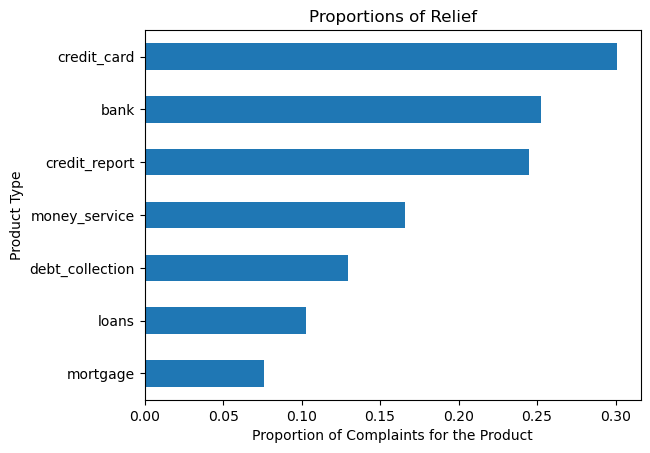

In [4]:
#visualize products and their proportions of relief
ex.relief_product2(train)

<div class="alert alert-success">    

### Insight: 

Credit card and bank related products have the highest chance of getting monetary relief at just under 20% of their total complaints. As for credit report products, we can see that they have the least chance of getting monetary relief.
</div>

<div class="alert alert-success">  
    
## <span style="color:darkgreen">Exploration Summary:</span>
    
* There are no specific words associated with a particular type of response in company responses.
* The most common words in company responses include account, credit, report, information, payment, loan, time, debt, company, and day.
* The response type "Closed with explanation" has the highest word count among the top words, suggesting that companies provide more detailed explanations in their responses.
* Companies tend to use fewer words in their responses when the response type is "Untimely response," possibly indicating less detailed explanations.
* The sentiment of consumer complaints/narratives correlates with the corresponding responses from companies across different industry sectors.
* Different product categories receive different types of responses based on the sentiment of the complaints/narratives.
* The analysis of words used in complaints and company responses suggests that specific words can be associated with certain product categories and used to predict the type of response.

# <span style="color:green">Modeling</span>

---

<div class="alert alert-success">  

### <span style="color:darkslategray">Data Sample:</span>
- Calculated the sample size for each class category using a 20% sampling rate.

- Created smaller datasets by sampling the specified number of samples from each class category.

### <span style="color:darkslategray">Term Frequencies used</span>
- TF-IDF w/ monograms, bigrams, and trigrams

### <span style="color:darkslategray">Selected Classification Models:</span>
- Decision Tree
- Linear Support Vector Classification
- Multi-Layer Perceptron

### <span style="color:darkslategray">Evaluation Metrics:</span>
- Recall
- Accuracy
    * **<span style="color:blue">Baseline: 79.31%</span>**

### <span style="color:darkslategray">Features Sent In:</span>
- Top 2,900 words in 'lemon' column

### <span style="color:darkslategray">Data Sample:</span>
- Calculated the sample size for each class category using a 20% sampling rate.

- Created smaller datasets by sampling the specified number of samples from each class category.


</div>

In [ ]:
# Split into samples/ Split in x and y variables
X_train, y_train, X_val, y_val, X_test, y_test = mo.process_data_modeling(train, validate, test)

In [ ]:
#Count Vectorizer & TD-IDF
#merge with encoded df
X_train_cv, X_val_cv, X_train_tfe, X_val_tfe, X_test_tfe = mo.process_vector_merge(X_train,X_val,X_test) 

In [ ]:
#baseline visualization
mo.baseline(y_train)

In [ ]:
# Model 1: Logistic Regression  avg runtime 7 min
# 2900 monograms TDF-IDF + encoded features
mo.log_monogram_model(X_train_tfe,y_train,X_val_tfe,y_val)

In [ ]:
# Model 2: Logistic Regression  avg runtime 17 min
# 2900 mono, bi, & trigrams TDF-IDF + encoded features
mo.log_multigram_model(X_train_tfe,y_train,X_val_tfe,y_val)

In [ ]:
# Model 3: Random Forest    avg runtime 30 sec
# 2900 mono, bi, & trigrams Count Vectorizer
mo.forest_multigram_model(X_train_cv,y_train,X_val_cv,y_val)

In [ ]:
# Model 4: Decision Tree    avg runtime 25 sec
# 2900 mono, bi, & trigrams TDF-IDF + encoded features
mo.tree_multigram_model(X_train_tfe,y_train,X_val_tfe,y_val)

### <span style="color:lightblue">Test Data Run:<span>

In [ ]:
# running best model on test data   avg runtime 25 sec
mo.test_tree(X_train_tfe,y_train,X_test_tfe,y_test)

<div class="alert alert-success">    

### Insight: 
   - All models did not exceed our expectations.
   
- The best-performing model on our train and validate data is a Decision Tree Classifier with a max depth of 9 and minimum sample leaf of 11.
- The validate data score was 79.35%. We decided to run it on the test data, and it gave us a score of 79.36%.
- We plan to experiment with different features, types of grams combinations, and metrics to improve our model's prediction percentage.
    
''
</div>

<div class="alert alert-success">  
    
## <span style="color:darkgreen">Modeling Summary:</span>
    
* We found that a Decision Tree Classifier with a max depth of 9 and minimum sample leaf of 11 performed the best on our train, validate and test data. However, all models fell short of our expectations, prompting us to explore different feature combinations, types of grams, and evaluation metrics to enhance our model's prediction accuracy.

# <span style="color:green">Conclusion</span>

---

<div class="alert alert-warning">  

<div class="alert alert-success"> 


# Project Summary:

* No specific words are associated with a particular type of response in company responses.
* Common words in company responses include account, credit, report, information, payment, loan, time, debt, company, and day.
* "Closed with explanation" response type has the highest word count among the top words, indicating more detailed explanations from companies.
* "Untimely response" tends to have fewer words, suggesting less detailed explanations.
* Sentiment in consumer complaints aligns with corresponding company responses across industry sectors.
* Different product categories receive distinct response types based on complaint sentiment.
* Analysis of complaint and response words suggests predictive potential for response type based on associated product categories.
* A Decision Tree Classifier with a max depth of 9 and minimum sample leaf of 11 performed best on train, validate, and test data, but all models fell short of expectations.
* Further exploration of feature combinations, n-gram types, and evaluation metrics is underway to enhance prediction accuracy.
 
</div>

<div class="alert alert-success">    

## Recommendations & Next Steps
* **Enhance Response Analysis**: The project highlights the need to analyze company responses to consumer complaints. Consider investing in natural language processing (NLP) techniques to extract meaningful insights from response data. By understanding the patterns and sentiments in responses, it might be possible to identify areas for improvement and optimize customer interactions.
* **Monitor Sentiment and Product Categories**: Pay attention to sentiment analysis of consumer complaints across different product categories. Identify trends in sentiment and response types to understand customer expectations and tailor the response strategies accordingly. This can help to improve the overall customer experience and target specific pain points in different product categories.
* **Address Discrimination and Bias**: Conduct further analysis on zip codes, states, and company responses to identify potential discrimination or bias in the complaint resolution process. Ensure fairness and equality by addressing any disparities and taking appropriate actions to eliminate discriminatory practices.
* **Identify Industry Trends**: Look for industry-specific trends by analyzing complaints related to specific companies, such as Silicon Valley Bank and Bank of America. This analysis can help identify emerging issues, detect patterns of non-compliance, and proactively address potential risks.
* **Continuous Improvement**: Treat the project as a starting point and continuously refine the complaint resolution processes. Regularly review customer feedback, complaints, and company responses to identify areas for improvement. Implement a feedback loop to integrate customer insights into operations and drive continuous improvement initiatives.

</div>